In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
from sklearn.metrics import accuracy_score

In [2]:
data = fetch_mldata("MNIST original")

In [3]:
x = data.data
y = data.target

In [4]:
xtrain = x[:60000]
ytrain = y[:60000]
xtest = x[60000:]
ytest = y[60000:]

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [34]:
p1 = Pipeline((
    ("ssc", StandardScaler()),
    ('rfc', RandomForestClassifier(random_state=42))))

In [35]:
p1.fit(xtrain, ytrain)

C:\Users\liviu\Anaconda3\envs\ztdl\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


Pipeline(steps=(('ssc', StandardScaler(copy=True, with_mean=True, with_std=True)), ('rfc', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False))))

In [20]:
ypred = p1.predict(xtest)
accuracy_score(ypred, ytest)

C:\Users\liviu\Anaconda3\envs\ztdl\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


0.94550000000000001

In [21]:
from sklearn.decomposition import PCA

In [24]:
pca1 = PCA(n_components=0.95)

In [25]:
pca1.fit(xtrain)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [28]:
xtr = pca1.transform(xtrain)
yte = pca1.transform(xtest)

In [36]:
p2 = Pipeline((
    ("ssc", StandardScaler()),
    ('rfc', RandomForestClassifier(random_state=42))))

In [37]:
p2.fit(xtrain, ytrain)

C:\Users\liviu\Anaconda3\envs\ztdl\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


Pipeline(steps=(('ssc', StandardScaler(copy=True, with_mean=True, with_std=True)), ('rfc', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False))))

In [33]:
ypred = p2.predict(xtest)
accuracy_score(ypred, ytest)

C:\Users\liviu\Anaconda3\envs\ztdl\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


0.94550000000000001

In [5]:
from sklearn.manifold import t_sne as t

In [13]:
ts = t.TSNE()

In [14]:
xr = ts.fit_transform(xtest)

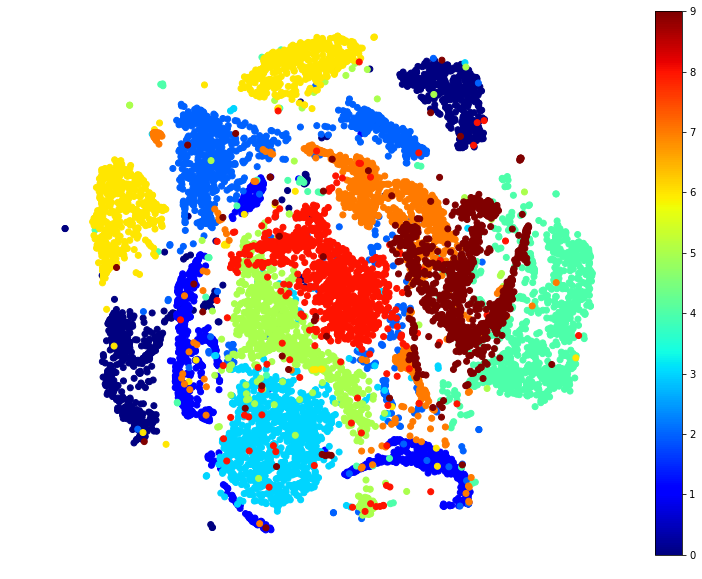

In [15]:
plt.figure(figsize=(13,10))
plt.scatter(xr[:, 0], xr[:, 1], c=ytest, cmap='jet')
plt.axis('off')
plt.colorbar()
plt.show()